In [1]:
from random import randint
from math import sqrt
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

week
1970-W02    18705
1970-W06    20232
1970-W10    20467
1970-W14    22123
1970-W18    25036
1970-W22    26839
1970-W26    29640
1970-W30    30935
1970-W34    28278
1970-W38    24235
Name: t, dtype: int64


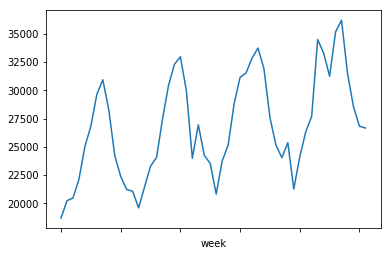

In [2]:
series = read_csv("beer-data.csv", header=0, index_col=0, sep=";", squeeze=True)

print(series.head(10))

series.plot()
pyplot.show()

[]

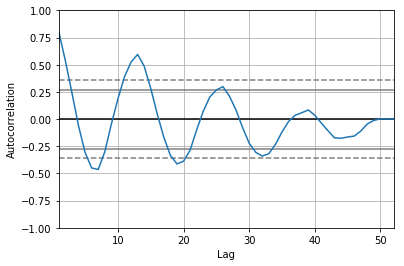

In [3]:
autocorrelation_plot(series)
pyplot.plot()

In [4]:
def predictWithARIMA(test, train, p,d,q):
    history = [x for x in train]
    predictions = list()
    
    for t in range(len(test)):
        model = ARIMA(history, order=(p,d,q))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    
    return [mae, mse, rmse]

In [5]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

results = list()

In [6]:
results.append(predictWithARIMA(test, train, 5, 1, 0))
results.append(predictWithARIMA(test, train, 4, 1, 0))
results.append(predictWithARIMA(test, train, 5, 0, 1))
results.append(predictWithARIMA(test, train, 2, 0, 0))
results.append(predictWithARIMA(test, train, 3, 2, 1))

/Users/tacionery/DevTools/Libs/miniconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/tacionery/DevTools/Libs/miniconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/tacionery/DevTools/Libs/miniconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tupl

In [7]:
for result in results:
    print(result)

[2773.55172829834, 10889390.074719464, 3299.9075857847088]
[2733.4973687502234, 10987256.579716912, 3314.703090733303]
[2228.5551563549216, 8581049.409981553, 2929.342829028646]
[1967.5280921961898, 8113126.727656952, 2848.355091567228]
[3118.830218817455, 13453536.642731883, 3667.906302338145]


The best build for ARIMA model was p=2, d=0 and q=0